<a href="https://colab.research.google.com/github/AbhaijeetSingh11/TextGeneration-Model-Comparision/blob/main/Model_comparision_TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers rouge-score numpy scikit-learn pandas

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c18c29c694e76dee854e9cb53d9241f95ef9dc4b672ebd498099eb92222d430e
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [2]:
!pip install rouge

In [3]:
from transformers import pipeline, set_seed
from sklearn.metrics import f1_score
from rouge import Rouge
import numpy as np
import pandas as pd

# Initialize the text generation pipelines
generator1 = pipeline('text-generation', model='distilbert/distilgpt2')
generator2 = pipeline('text-generation', model='gpt2')
generator3 = pipeline('text-generation', model='microsoft/DialoGPT-medium')
generator4 = pipeline('text-generation', model='ai-forever/rugpt3small_based_on_gpt2')
generator5 = pipeline('text-generation', model='openai-community/gpt2-large')


set_seed(42)

# Generate text from each model
input_text = "hey, how are you my friend"
ans1 = generator1(input_text, max_length=30, num_return_sequences=5)
ans2 = generator2(input_text, max_length=30, num_return_sequences=5)
ans3 = generator3(input_text, max_length=30, num_return_sequences=5, do_sample=True)
ans4 = generator4(input_text, max_length=30, num_return_sequences=5, do_sample=True)
ans5 = generator5(input_text, max_length=30, num_return_sequences=5)


# Extract generated texts
def extract_texts(generated_sequences):
    return [seq['generated_text'] for seq in generated_sequences]

texts1 = extract_texts(ans1)
texts2 = extract_texts(ans2)
texts3 = extract_texts(ans3)
texts4 = extract_texts(ans4)
texts5 = extract_texts(ans5)


# Function to calculate F1-score
def calculate_f1_score(reference, hypothesis):
    reference_tokens = set(reference.split())
    hypothesis_tokens = set(hypothesis.split())
    common_tokens = reference_tokens.intersection(hypothesis_tokens)
    precision = len(common_tokens) / len(hypothesis_tokens) if len(hypothesis_tokens) > 0 else 0
    recall = len(common_tokens) / len(reference_tokens) if len(reference_tokens) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

# Function to calculate ROUGE scores
def calculate_rouge_scores(reference, hypothesis):
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    return scores[0]

# Function to calculate diversity score
def calculate_diversity_score(texts):
    unique_tokens = set()
    total_tokens = 0
    for text in texts:
        tokens = text.split()
        unique_tokens.update(tokens)
        total_tokens += len(tokens)
    diversity_score = len(unique_tokens) / total_tokens if total_tokens > 0 else 0
    return diversity_score

# Function to calculate average response length
def calculate_avg_response_length(texts):
    return np.mean([len(text.split()) for text in texts])

# Reference text (input text is used as reference for simplicity)
reference_text = input_text

# Function to calculate all metrics for a model
def calculate_all_metrics(texts, model_name):
    f1_scores = [calculate_f1_score(reference_text, text) for text in texts]
    rouge_scores = [calculate_rouge_scores(reference_text, text) for text in texts]
    avg_rouge_1 = np.mean([score['rouge-1']['f'] for score in rouge_scores])
    avg_rouge_2 = np.mean([score['rouge-2']['f'] for score in rouge_scores])
    avg_rouge_l = np.mean([score['rouge-l']['f'] for score in rouge_scores])
    diversity_score = calculate_diversity_score(texts)
    avg_response_length = calculate_avg_response_length(texts)

    return {
        "Model": model_name,
        "Avg F1-score": np.mean(f1_scores),
        "Avg ROUGE-1": avg_rouge_1,
        "Avg ROUGE-2": avg_rouge_2,
        "Avg ROUGE-L": avg_rouge_l,
        "Diversity Score": diversity_score,
        "Avg Response Length": avg_response_length
    }

# Calculate metrics for each model
results = []
results.append(calculate_all_metrics(texts1, "DistilGPT2"))
results.append(calculate_all_metrics(texts2, "GPT2"))
results.append(calculate_all_metrics(texts3, "DialoGPT-medium"))
results.append(calculate_all_metrics(texts4, "Rugpt3small"))
results.append(calculate_all_metrics(texts5, "gpt2-large"))


# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv("model_comparison_results2.csv", index=False)

print("Results saved to 'model_comparison_results_final1.csv'")
print(results_df)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/863M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/551M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Truncation was not explicitly activated but `max_length` is provided a specific value

Results saved to 'model_comparison_results_final1.csv'
             Model  Avg F1-score  Avg ROUGE-1  Avg ROUGE-2  Avg ROUGE-L  \
0       DistilGPT2      0.487469     0.481543     0.412015     0.481543   
1             GPT2      0.406957     0.415641     0.356729     0.415641   
2  DialoGPT-medium      0.833333     0.833333     0.800000     0.833333   
3      Rugpt3small      0.439179     0.459264     0.385921     0.459264   
4       gpt2-large      0.367757     0.389450     0.325744     0.389450   

   Diversity Score  Avg Response Length  
0         0.622222                 18.0  
1         0.666667                 19.2  
2         0.266667                  6.0  
3         0.673684                 19.0  
4         0.707965                 22.6  


In [4]:
data = pd.read_csv("/content/model_comparison_results2.csv")

In [5]:
data

,Model,Avg F1-score,Avg ROUGE-1,Avg ROUGE-2,Avg ROUGE-L,Diversity Score,Avg Response Length
0,DistilGPT2,0.487469,0.481543,0.412015,0.481543,0.622222,18.0
1,GPT2,0.406957,0.415641,0.356729,0.415641,0.666667,19.2
2,DialoGPT-medium,0.833333,0.833333,0.800000,0.833333,0.266667,6.0
3,Rugpt3small,0.439179,0.459264,0.385921,0.459264,0.673684,19.0
4,gpt2-large,0.367757,0.389450,0.325744,0.389450,0.707965,22.6


In [6]:
import matplotlib.pyplot as plt

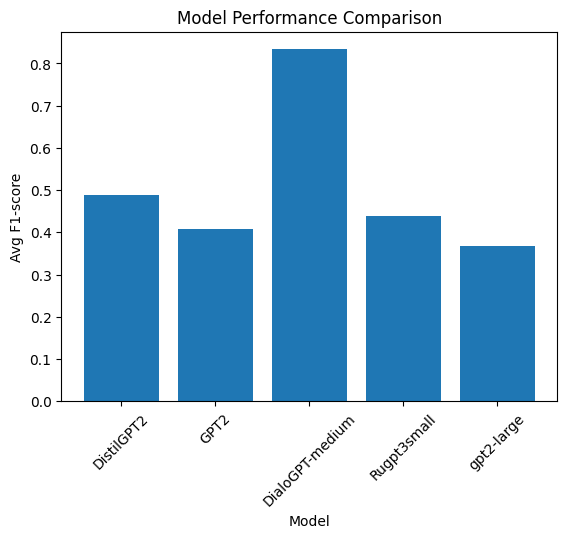

In [12]:


plt.bar(x=data['Model'], height=data['Avg F1-score'])
plt.xlabel("Model")
plt.ylabel("Avg F1-score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()


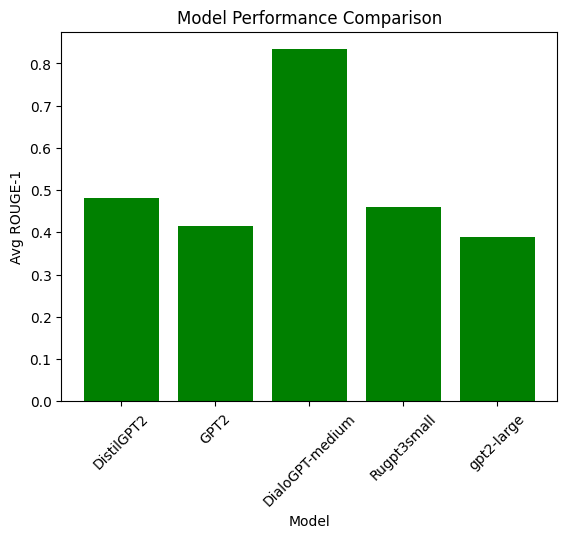

In [11]:
import matplotlib.pyplot as plt

plt.bar(x=data['Model'], height=data['Avg ROUGE-1'],color='green')
plt.xlabel("Model")
plt.ylabel("Avg ROUGE-1")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()


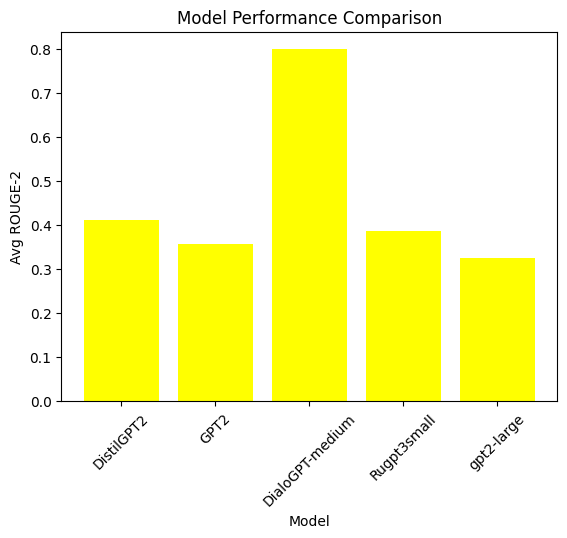

In [10]:
import matplotlib.pyplot as plt

plt.bar(x=data['Model'], height=data['Avg ROUGE-2'],color='yellow')
plt.xlabel("Model")
plt.ylabel("Avg ROUGE-2")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

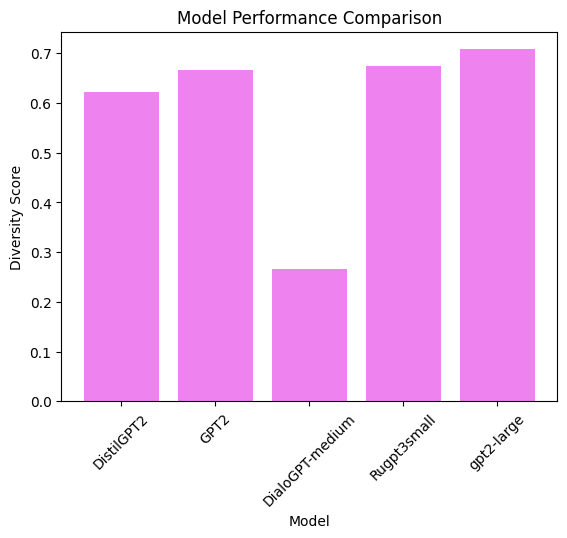

In [9]:
import matplotlib.pyplot as plt

plt.bar(x=data['Model'], height=data['Diversity Score'],color='violet')
plt.xlabel("Model")
plt.ylabel("Diversity Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

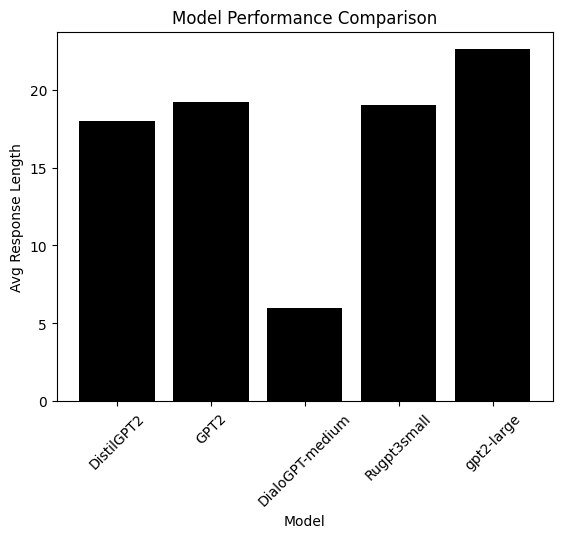

In [8]:
plt.bar(x=data['Model'], height=data['Avg Response Length'],color='black')
plt.xlabel("Model")
plt.ylabel("Avg Response Length")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

In [7]:
data.columns

Index(['Model', 'Avg F1-score', 'Avg ROUGE-1', 'Avg ROUGE-2', 'Avg ROUGE-L',
       'Diversity Score', 'Avg Response Length'],
      dtype='object')

#Now apply topsis on this csv file:
###Step 1: pip install 102217186-abhaijeet-topsis==1.0.0
###Step 2: python -m 102217186_abhaijeet_topsis "input_file" "weights" "impacts" "output_file"

### OR
### use the below function⬇️⬇️

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata



def topsis(input_file, weights, impacts, output_file):
    try:
        data = pd.read_csv(input_file)

        if data.shape[1] < 3:
            raise Exception("Input file must have at least three columns: identifier and criteria.")

        identifiers = data.iloc[:, 0]
        matrix = data.iloc[:, 1:].values

        weights = np.array([float(w) for w in weights.split(',')])
        impacts = impacts.split(',')

        if len(weights) != matrix.shape[1] or len(impacts) != matrix.shape[1]:
            raise Exception("Number of weights and impacts must match the number of criteria.")

        if not all(i in ['+', '-'] for i in impacts):
            raise Exception("Impacts must be '+' or '-'.")

        norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))
        weighted_matrix = norm_matrix * weights

        ideal_best = [max(weighted_matrix[:, j]) if impacts[j] == '+' else min(weighted_matrix[:, j])
                      for j in range(len(impacts))]
        ideal_worst = [min(weighted_matrix[:, j]) if impacts[j] == '+' else max(weighted_matrix[:, j])
                       for j in range(len(impacts))]

        distances_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
        distances_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

        scores = distances_worst / (distances_best + distances_worst)
        ranks = rankdata(-scores, method='dense')  # Negate scores for descending ranking
        # ranks = scores.argsort()[::-1] + 1

        output_data = data.copy()
        output_data['Topsis Score'] = scores
        output_data['Rank'] = ranks
        output_data.to_csv(output_file, index=False)
        print(f"Results saved to {output_file}")

    except Exception as e:
        print(f"Error: {e}")


In [14]:
inputfile = '/content/model_comparison_results2.csv'
outputfile = '/content/model_topsis_results2.csv'
weights = "0.25,0.20,0.15,0.15,0.15,0.10"
impacts = "+,+,+,+,+,-"
topsis(inputfile, weights, impacts, outputfile)

Results saved to /content/model_topsis_results2.csv


In [15]:
topsis_data = pd.read_csv("/content/model_topsis_results2.csv")
topsis_data

,Model,Avg F1-score,Avg ROUGE-1,Avg ROUGE-2,Avg ROUGE-L,Diversity Score,Avg Response Length,Topsis Score,Rank
0,DistilGPT2,0.487469,0.481543,0.412015,0.481543,0.622222,18.0,0.306070,2
1,GPT2,0.406957,0.415641,0.356729,0.415641,0.666667,19.2,0.244686,4
2,DialoGPT-medium,0.833333,0.833333,0.800000,0.833333,0.266667,6.0,0.760929,1
3,Rugpt3small,0.439179,0.459264,0.385921,0.459264,0.673684,19.0,0.280064,3
4,gpt2-large,0.367757,0.389450,0.325744,0.389450,0.707965,22.6,0.239071,5


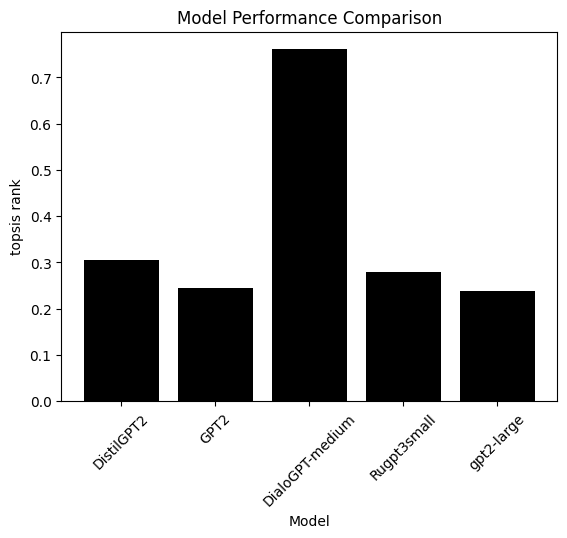

In [18]:
plt.bar(x=topsis_data['Model'], height=topsis_data['Topsis Score'],color='black')
plt.xlabel("Model")
plt.ylabel("topsis rank")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.show()

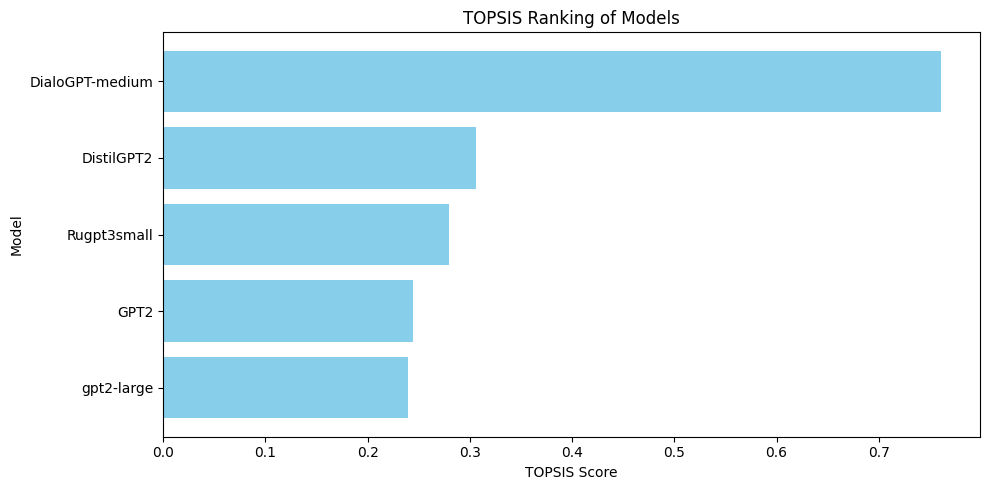

In [19]:
final = pd.read_csv('/content/model_topsis_results2.csv')  # Replace with your CSV path
# Sort the DataFrame by TOPSIS Score (ascending to show highest at top after inversion)
final = final.sort_values('Topsis Score', ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(final.iloc[:, 0], final['Topsis Score'], color='skyblue')
plt.xlabel('TOPSIS Score')
plt.ylabel('Model')
plt.title('TOPSIS Ranking of Models')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig(f'topsis_models_comparison.png')
plt.show()